In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [412]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/TelecomCustomerChurn.csv')

Verificando o conteúdo do Dataset:

In [413]:
df.head(5)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [415]:
df.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [416]:
df.duplicated().sum()

np.int64(0)

In [417]:
df = df[df['TotalCharges'].str.strip() != '']
df['TotalCharges'] = df['TotalCharges'].astype(float)

Não existem linhas duplicadas ou nulas, prosseguindo para o tratamento das variáveis categóricas

In [418]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df = pd.get_dummies(df, columns=['InternetService'],drop_first=True)
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df = pd.get_dummies(df, columns=['Contract'],drop_first=True)
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df = pd.get_dummies(df, columns=['PaymentMethod'],drop_first=True)
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Feature Engineering

In [443]:
df['AverageMonthlyBill'] = df['TotalCharges'] / df['Tenure']
df['ActiveServices'] = df['PhoneService'] + df['OnlineSecurity'] + df['OnlineBackup'] + df['DeviceProtection'] + df['TechSupport'] + df['StreamingTV'] + df['StreamingMovies']
df['MonthlyBillPerService'] = df['AverageMonthlyBill'] * df['ActiveServices']

In [420]:
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Manual,AverageMonthlyBill,ActiveServices
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,0,False,False,False,False,False,True,29.850000,1
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1889.50,0,False,False,True,False,False,True,55.573529,3
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,108.15,1,False,False,False,False,False,True,54.075000,3
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1840.75,0,False,False,True,False,False,False,40.905556,3
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,151.65,1,True,False,False,False,False,True,75.825000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,0,...,1990.50,0,False,False,True,False,False,True,82.937500,6
7039,2234-XADUH,0,0,1,1,72,1,1,0,1,...,7362.90,0,True,False,True,False,True,False,102.262500,5
7040,4801-JZAZL,0,0,1,1,11,0,0,1,0,...,346.45,0,False,False,False,False,False,True,31.495455,1
7041,8361-LTMKD,1,1,1,0,4,1,1,0,0,...,306.60,1,True,False,False,False,False,True,76.650000,1


In [444]:
features = [ 'Gender'          
,'SeniorCitizen'   
,'Partner'         
,'Dependents'      
,'Tenure'          
,'PhoneService'    
,'MultipleLines'   
,'OnlineSecurity'  
,'OnlineBackup'    
,'DeviceProtection'
,'TechSupport'     
,'StreamingTV'     
,'StreamingMovies' 
,'PaperlessBilling'
,'AverageMonthlyBill'
,'ActiveServices'
,'MonthlyCharges'  
,'TotalCharges'
,'MonthlyBillPerService'
] + [col for col in df.columns if 'InternetService_' in col] + [col for col in df.columns if 'Contract_' in col] + [col for col in df.columns if 'PaymentMethod_' in col]

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   Gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   Tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   MultipleLines                          7032 non-null   int64  
 8   OnlineSecurity                         7032 non-null   int64  
 9   OnlineBackup                           7032 non-null   int64  
 10  DeviceProtection                       7032 non-null   int64  
 11  TechSuppo

Definindo Features e Variável de Interesse

In [446]:
x = df[features]
y = df['Churn']

Separando dados de teste e treino

In [447]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature-Scaling

In [448]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [449]:
X_train[:5], X_test[:5]

(array([[-1.01378388, -0.43758982, -0.9624811 , -0.65368396,  0.43467403,
         -3.04070742, -0.84554067, -0.63517172, -0.7281455 ,  1.38474948,
         -0.63875661,  1.26181056,  1.2472596 ,  0.83139683, -0.54250021,
          0.02933229, -0.51862031, -0.08790784, -0.43077923, -0.88544634,
         -0.52984687, -0.51827235, -0.5611299 , -0.52764485, -1.14831681],
        [ 0.98640353, -0.43758982, -0.9624811 , -0.65368396, -1.19565249,
          0.32887084, -0.84554067, -0.63517172, -0.7281455 , -0.72215228,
         -0.63875661,  1.26181056, -0.80175771, -1.20279506, -0.05949769,
         -0.5134116 , -0.3744434 , -0.92128463, -0.52350168, -0.88544634,
         -0.52984687, -0.51827235, -0.5611299 ,  1.89521417, -1.14831681],
        [-1.01378388, -0.43758982,  1.03898144, -0.65368396,  0.92377199,
          0.32887084,  1.18267522, -0.63517172, -0.7281455 ,  1.38474948,
         -0.63875661, -0.79251199, -0.80175771,  0.83139683,  0.54051881,
         -0.5134116 ,  0.43261589,  

Aplicando Random Forest

N_estimators = quantidade de random trees criadas na random forest, maior precisão e maior carga de processamento

In [450]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

<Axes: >

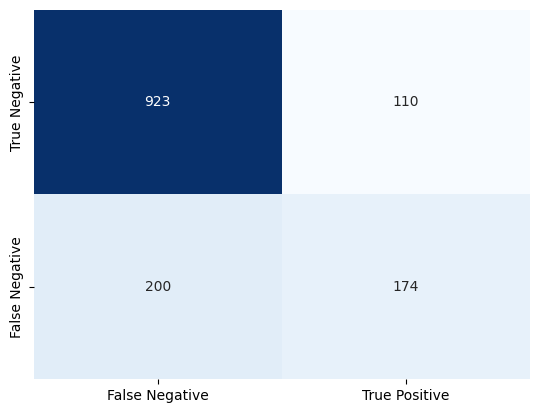

In [451]:
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [452]:
print(clf_report, accuracy)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407
 0.7796730632551528


# Logistic Regression

In [430]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_req = log_reg.predict(X_test)
conf_matrix_log_req = confusion_matrix(y_test, y_pred_log_req)
class_report_log_req = classification_report(y_test, y_pred_log_req)
accuracy_log_req = accuracy_score(y_test, y_pred_log_req)

<Axes: >

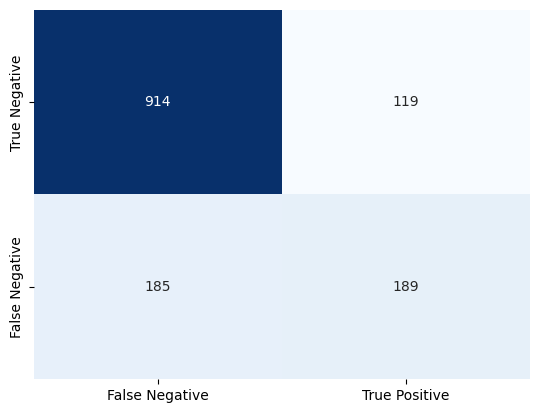

In [453]:
sns.heatmap(
    conf_matrix_log_req, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [455]:
print(class_report_log_req, accuracy_log_req)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407
 0.7839374555792467


Feature-Importance

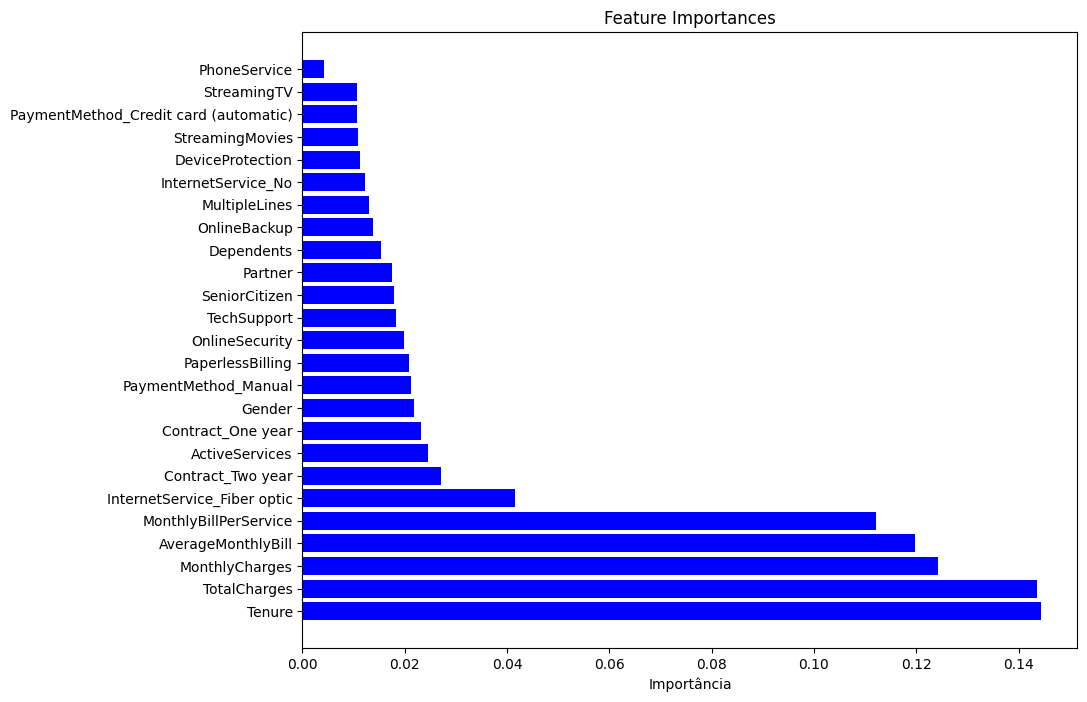

In [456]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), names)
plt.xlabel('Importância')
plt.show()

Support Vector Machines

In [457]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

<Axes: >

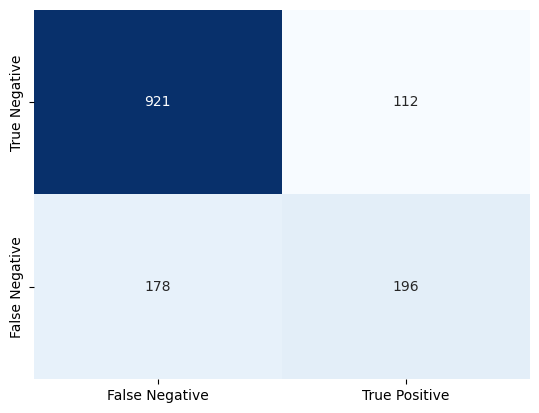

In [458]:
sns.heatmap(
    conf_matrix_svm, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [459]:
print(class_report_svm, accuracy_svm)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407
 0.7938877043354655


KNN

In [460]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


<Axes: >

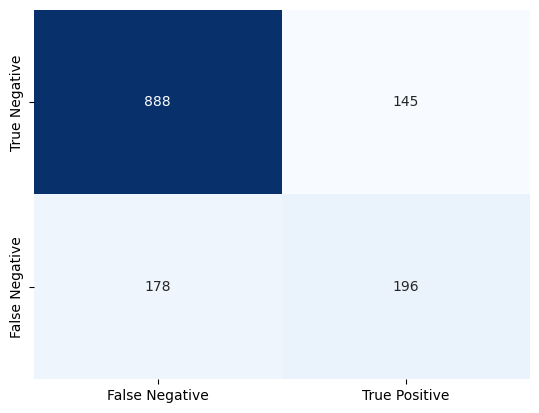

In [461]:
sns.heatmap(
    conf_matrix_knn, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [462]:
print(class_report_knn, accuracy_knn)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.57      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407
 0.7704335465529495


Gradient Boosting Classifier

In [463]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

<Axes: >

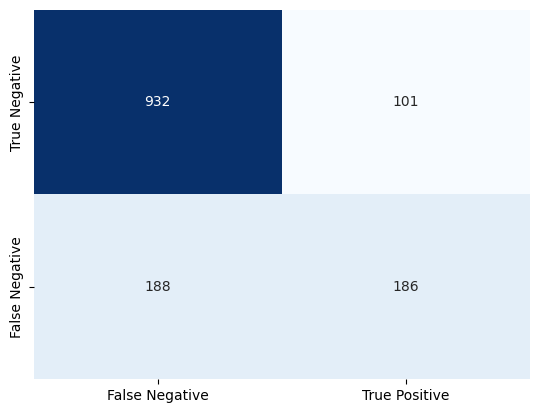

In [464]:
sns.heatmap(
    conf_matrix_gb, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [442]:
print(class_report_gb, accuracy_gb)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407
 0.7896233120113717


Feature Engineering